In [15]:
#Se importan las librerias necesarias
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

Experimento 1

In [16]:
#Se crean los datos
X1, y1 = make_regression(
    n_samples=2000,
    random_state=0
)

In [17]:
#Se dividen los datos
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.30, random_state=0
)

In [35]:
#Creación del modelo
modelo_reg1 = GradientBoostingRegressor(
    n_estimators=200,
    random_state=0
)

In [36]:
#Entrenando el modelo
modelo_reg1=modelo_reg1.fit(X1_train, y1_train)

In [37]:
#Evaluando el modelo
r2_score(
    y_true=y1_test,
    y_pred=modelo_reg1.predict(X1_test)
)

0.9436297259416307

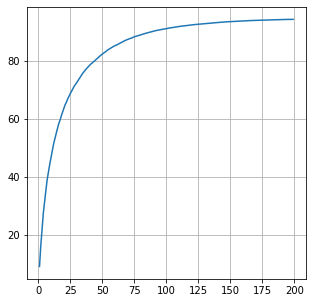

El número de estimadores optimo es: 199


In [34]:
#Verificando gráficamente como afecta el parámetro n_estimadores el r2_score
resultado = {}
for i in range(1,200):
    #Creando el modelo
    modelo_reg1 = GradientBoostingRegressor(
        n_estimators=i,
        random_state=0
    )
    #Entrenando el modelo
    modelo_reg1=modelo_reg1.fit(X1_train, y1_train)
    #Evaluando el modelo
    resultado[i] = r2_score(
        y_true=y1_test,
        y_pred=modelo_reg1.predict(X1_test)
    )*100
#Se gráfica el resultado
plt.figure(figsize=(5,5))
plt.plot(resultado.keys(), resultado.values())
plt.grid()
plt.show()
#Se extrae el numero de estimadores más optimo
estimador_optimo = 1
for clave, valor in resultado.items():
    if valor == max(resultado.values()):
        estimador_optimo = clave
        break
print('El número de estimadores optimo es: {}'.format(estimador_optimo))